In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

# EDA

In [2]:
!ls ../data/

geo_params.csv	sku_final.csv  test_data.csv  train_final.csv


In [3]:
geo_params = pd.read_csv('../data/geo_params.csv')

In [4]:
geo_params.head()

,geoCluster,cityId
0,21,1
1,47,1
2,48,1
3,92,1
4,112,1


In [5]:
geo_params['geoCluster'].nunique()

515

In [6]:
geo_params['cityId'].nunique()

3

In [7]:
train_data = pd.read_csv('../data/train_final.csv')

In [4]:
train_data.head()

,ID,geoCluster,SKU,date,price,sales
0,RR27956447,21,32485,2021-07-08,39.69,0.9
1,RR27956448,21,32485,2021-07-09,NaN,NaN
2,RR27956449,21,32485,2021-07-10,NaN,NaN
3,RR27956450,21,32485,2021-07-11,NaN,NaN
4,RR27956451,21,32485,2021-07-12,NaN,NaN


In [9]:
train_data['price'].isna().sum()==train_data['sales'].isna().sum()

True

In [5]:
train_data['date'].min(), train_data['date'].max()

('2020-01-01', '2021-07-19')

In [6]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [7]:
train_data['month'] = train_data['date'].dt.month

In [8]:
train_data['day'] = train_data['date'].dt.day

In [27]:
train_data.head(2)

,ID,geoCluster,SKU,date,price,sales,month,day
0,RR27956447,21,32485,2021-07-08,39.69,0.9,7,8
1,RR27956448,21,32485,2021-07-09,NaN,0.0,7,9


In [12]:
sorted(train_data.month.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [13]:
unique_products = train_data['SKU'].unique()

In [14]:
len(unique_products)

1925

In [15]:
unique_geo_cluster = train_data['geoCluster'].unique()

In [16]:
len(unique_geo_cluster)

512

In [17]:
len(unique_geo_cluster)*len(unique_products)

985600

In [18]:
train_data.shape

(27956445, 8)

In [24]:
# most of rows are zeros

In [57]:
train_data['price'].isna().sum()/train_data.shape[0]

0.9291259314265459

In [53]:
train_data.sales.max()

801.0

<AxesSubplot:xlabel='sales', ylabel='Count'>

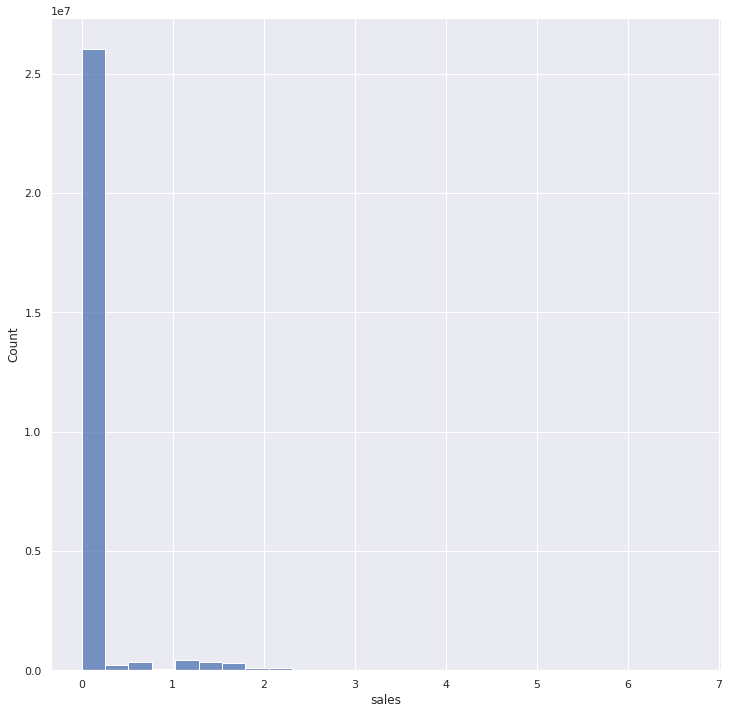

In [55]:
plt.figure(figsize=(12,12))
sns.histplot(np.log1p(train_data.sales))

In [20]:
train_data['sales'] = train_data['sales'].fillna(0)

In [23]:
# price is different for the same product

In [21]:
sku_price_table = train_data.fillna(0).groupby('SKU', as_index=False).agg({'price' : lambda x: list(set(x))})

In [22]:
sku_price_table['price'].apply(len).mean()

17.75948051948052

In [33]:
# number of products that were not bought at all

In [35]:
(train_data.groupby('SKU')['sales'].sum()==0).sum()

5

In [26]:
# trying to figure out the price change for same products for same clusters during monthes

In [46]:
aggregated_price = train_data.groupby(['SKU','geoCluster', 'month'], as_index=False).agg({'price' : list, 'day' : list})

In [47]:
aggregated_price = aggregated_price[aggregated_price['price'].apply(lambda x: any([~np.isnan(i) for i in x]))]

In [48]:
aggregated_price.head()

,SKU,geoCluster,month,price,day
7,17,1990,12,"[55.49, nan, nan, 49.79, 49.79, nan, nan, 61.1...","[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2..."
15,17,1992,12,"[49.79, nan, nan, 49.79, nan, nan, nan, nan, n...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
23,17,1993,12,"[49.79, nan, nan, nan, nan, nan, nan, nan, nan...","[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3..."
31,17,1994,11,[80.99],[30]
32,17,1994,12,"[80.99, nan, nan, nan, 49.79, nan, nan, nan, 4...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [49]:
aggregated_price['price'].apply(len).mean()

30.400098198339204